                                        Flight Delay Prediction
                                      Dataset:  https://www.bts.gov/
                                  

### Summary:

There have been numerous insatances of flight delays in the current air travel scenario in USA. Many airlines are incurring huge losses because of it. Any airline company would be more interested in reducing the number of delayed flights as to be in top choice for it's customers. On the other hand, a customer always tends to book an airline flight which is most likely to be on-time.

For this project, our primary focus is on American Airlines(AA) where we are going to focus on top 5 origins and destinations airports for AA. 

The dataset used for the analysis is from Kaggel : https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018

1. We Considered an entire year's dataset for 2017 and tried to build our ML model and then have it tasted on the        unseen dataset of 2018. 
2. We are focusing more from a cosumer point of view and try to predict the flight delay for next year which is 2018.
3. The customer would be more concerned about the arriving delay of the flight. So, our target variable would be        predicting an arriving delay of the flight.
4. According to FAA/DOT standards, a flighs is considered to be delayed if it surpasses the minimum threshold of        14.59 mins.


### Importing Required libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta as dt
import math
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from matplotlib.pyplot import figure
import warnings
import math
from scipy.stats import norm
warnings.filterwarnings("ignore")

### Data Import 

In [2]:
df2017 = pd.read_csv('2017.csv') #reading all the data for year 2017
df2018 = pd.read_csv('2018.csv') #reading all the data for year 2018

In [3]:
print("Shape :", df2017.shape) #Checking the shape of the dataset at hand

Shape : (5674621, 28)


In [4]:
df2017.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,...,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,...,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,...,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,...,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,...,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,NaN


### Data Exploration and Preprocessing

Since, we are concentrating on American Airlines(AA), lets filter out all the records for it from our dataset.

In [5]:
new_df17 = df2017.loc[(df2017['OP_CARRIER']=='AA')]
new_df18 = df2018.loc[(df2018['OP_CARRIER']=='AA')]

##### Checking for null values in dataset

In [6]:
new_df17.isnull().sum()

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                11521
DEP_DELAY               11536
TAXI_OUT                12075
WHEELS_OFF              12075
WHEELS_ON               12338
TAXI_IN                 12338
CRS_ARR_TIME                0
ARR_TIME                12338
ARR_DELAY               14130
CANCELLED                   0
CANCELLATION_CODE      884210
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME     14130
AIR_TIME                14130
DISTANCE                    0
CARRIER_DELAY          734322
WEATHER_DELAY          734322
NAS_DELAY              734322
SECURITY_DELAY         734322
LATE_AIRCRAFT_DELAY    734322
Unnamed: 27            896348
dtype: int64

We have most of the null values in columns 'CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 27'. The best approach we followed is to drop the subsequent columns which accounted for 81% of the dataset. 

#### Dropping all the unnecessary columns

In [7]:
new_df17 = new_df17.drop(columns = ['CANCELLATION_CODE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY',\
                                  'LATE_AIRCRAFT_DELAY','Unnamed: 27'])
new_df18 = new_df18.drop(columns = ['CANCELLATION_CODE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY',\
                                   'LATE_AIRCRAFT_DELAY','Unnamed: 27'])

#### Again Checking for the null values for both years dataset

In [8]:
new_df17.isnull().sum()
new_df18.isnull().sum()

FL_DATE                    0
OP_CARRIER                 0
OP_CARRIER_FL_NUM          0
ORIGIN                     0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME               14238
DEP_DELAY              14256
TAXI_OUT               14868
WHEELS_OFF             14868
WHEELS_ON              15176
TAXI_IN                15176
CRS_ARR_TIME               0
ARR_TIME               15176
ARR_DELAY              17291
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME    17291
AIR_TIME               17291
DISTANCE                   0
dtype: int64

We noticed that the flights which are getting Cancelled/Diverted have the null values in some columns. 
Since, the cancelled/Diverted flights are not our concern, We are removing all the instances for Cancelled/Diverted 

In [9]:
new_df17 = new_df17.loc[(new_df17['CANCELLED']==0.0)]
new_df17 = new_df17.loc[(new_df17["DIVERTED"]==0.0)]

new_df18 = new_df18.loc[(new_df18['CANCELLED']==0.0)]
new_df18 = new_df18.loc[(new_df18["DIVERTED"]==0.0)]

The cancelled/divereted flights did not make it to airport, hence the null values in DEP TIME, DEP_DELAY

In [10]:
new_df17.isnull().sum()

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

As you can see, just by removing the cancelled and diverted flights, we got rid of the null values in the data

In [11]:
new_df17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882218 entries, 0 to 5671594
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              882218 non-null  object 
 1   OP_CARRIER           882218 non-null  object 
 2   OP_CARRIER_FL_NUM    882218 non-null  int64  
 3   ORIGIN               882218 non-null  object 
 4   DEST                 882218 non-null  object 
 5   CRS_DEP_TIME         882218 non-null  int64  
 6   DEP_TIME             882218 non-null  float64
 7   DEP_DELAY            882218 non-null  float64
 8   TAXI_OUT             882218 non-null  float64
 9   WHEELS_OFF           882218 non-null  float64
 10  WHEELS_ON            882218 non-null  float64
 11  TAXI_IN              882218 non-null  float64
 12  CRS_ARR_TIME         882218 non-null  int64  
 13  ARR_TIME             882218 non-null  float64
 14  ARR_DELAY            882218 non-null  float64
 15  CANCELLED       

#### Now we are identifying top 5 Origin cities and top 5 destinations for American Airlines

We are acheiving this by tracking most number of flight taken off from any origin city in USA

In [12]:
top_origin_counts = new_df17['ORIGIN'].value_counts().tolist()[:5] #Using Value_vounts to identify most number of \
                                                                    #occurances for any origin city airport.
top_origin_cities = new_df17['ORIGIN'].value_counts().index.tolist()[:5]
top_dest_counts = new_df17['DEST'].value_counts().tolist()[:5]#Using Value_vounts to identify most number of \
                                                                    #occurances for any desination city airport.
top_dest_cities = new_df17['DEST'].value_counts().index.tolist()[:5]

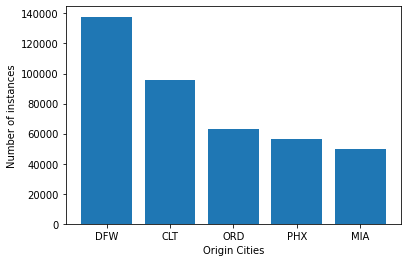

<Figure size 320x480 with 0 Axes>

In [13]:
plt.bar(top_origin_cities,top_origin_counts)
plt.xlabel("Origin Cities")
plt.ylabel("Number of instances")
plt.figure(figsize=(4,6), dpi=80, facecolor='w', edgecolor='k')
plt.show()

We got top 5 origin airports as 'DFW', 'CLT', 'ORD','PHX','MIA'

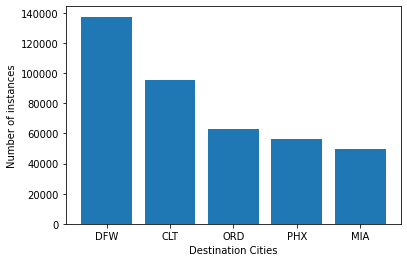

<Figure size 320x480 with 0 Axes>

In [14]:
plt.bar(top_dest_cities,top_dest_counts)
plt.xlabel("Destination Cities")
plt.ylabel("Number of instances")
plt.figure(figsize=(4,6), dpi=80, facecolor='w', edgecolor='k')
plt.show()

Now, we got top 5 destination airports as 'DFW', 'CLT', 'ORD','PHX','MIA', which are same as our origin.

Now we lets filter our dataset for these 5 Origins and Destinations

In [15]:
new_df17= new_df17[new_df17['ORIGIN'].isin(top_origin_cities)]
new_df18 = new_df18[new_df18['ORIGIN'].isin(top_origin_cities)]

new_df17 = new_df17[new_df17['DEST'].isin(top_dest_cities)]
new_df18 = new_df18[new_df18['DEST'].isin(top_dest_cities)]

Note 1 - Our analysis is based on the data that a passenger will have, such as Scheduled departure, scheduled                  Arrival, scheduled air time etc. So we are dropping other columns as below

In [16]:
new_df17 = new_df17.drop(columns=['OP_CARRIER','OP_CARRIER_FL_NUM','DEP_TIME','DEP_DELAY','TAXI_OUT','WHEELS_OFF',\
                                  'TAXI_IN','WHEELS_ON','ARR_TIME', 'CANCELLED', 'DIVERTED','ACTUAL_ELAPSED_TIME',\
                                 'AIR_TIME', 'DISTANCE'])

new_df18 = new_df18.drop(columns=['OP_CARRIER','OP_CARRIER_FL_NUM','DEP_TIME','DEP_DELAY','TAXI_OUT','WHEELS_OFF',\
                                  'TAXI_IN','WHEELS_ON','ARR_TIME', 'CANCELLED', 'DIVERTED','ACTUAL_ELAPSED_TIME',\
                                 'AIR_TIME','DISTANCE'])

##### Now we are converting our 'FL_DATE' column to datetime and extracting a weekdaty from it

In [17]:
new_df17['Day_of_week'] = pd.to_datetime(new_df17['FL_DATE']).dt.weekday
new_df18['Day_of_week'] = pd.to_datetime(new_df18['FL_DATE']).dt.weekday

In [18]:
new_df17.head()

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,Day_of_week
44,2017-01-01,DFW,MIA,1730,2113,-11.0,163.0,6
45,2017-01-01,MIA,DFW,705,920,160.0,195.0,6
144,2017-01-01,DFW,MIA,1228,1610,25.0,162.0,6
145,2017-01-01,MIA,DFW,1826,2045,31.0,199.0,6
156,2017-01-01,MIA,ORD,2020,2244,9.0,204.0,6


Since we have day of the week where 0 is Monday and 6 is Sunday, We are dividing the month in 3 parts

In [19]:
# Defining a function for 3 parts of the month to see if the flight delays are more frequent in any part of the month.
def month_period(x):
    if x in range(1,10):
        return('Month_Start')
    elif x in range(10,20):
        return('Mid-Month')
    else:
        return('Month_end')

In [20]:
new_df17['Week_of_month'] = pd.to_datetime(new_df17['FL_DATE']).dt.day.apply(month_period)
new_df18['Week_of_month'] = pd.to_datetime(new_df18['FL_DATE']).dt.day.apply(month_period)

In [21]:
new_df17.head()

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,Day_of_week,Week_of_month
44,2017-01-01,DFW,MIA,1730,2113,-11.0,163.0,6,Month_Start
45,2017-01-01,MIA,DFW,705,920,160.0,195.0,6,Month_Start
144,2017-01-01,DFW,MIA,1228,1610,25.0,162.0,6,Month_Start
145,2017-01-01,MIA,DFW,1826,2045,31.0,199.0,6,Month_Start
156,2017-01-01,MIA,ORD,2020,2244,9.0,204.0,6,Month_Start


We have label encoded the week of the month column. Now we are making the dummy variables for it.

In [22]:
new_df17 = pd.get_dummies(new_df17,columns =['Week_of_month','Day_of_week'],drop_first=True)
new_df18 = pd.get_dummies(new_df18,columns =['Week_of_month','Day_of_week'],drop_first=True)

In [23]:
new_df17.head()

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,Week_of_month_Month_Start,Week_of_month_Month_end,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6
44,2017-01-01,DFW,MIA,1730,2113,-11.0,163.0,1,0,0,0,0,0,0,1
45,2017-01-01,MIA,DFW,705,920,160.0,195.0,1,0,0,0,0,0,0,1
144,2017-01-01,DFW,MIA,1228,1610,25.0,162.0,1,0,0,0,0,0,0,1
145,2017-01-01,MIA,DFW,1826,2045,31.0,199.0,1,0,0,0,0,0,0,1
156,2017-01-01,MIA,ORD,2020,2244,9.0,204.0,1,0,0,0,0,0,0,1


Also, we are interested to see if the season of the year has any impact on the flight delay. 
So we have defined a function to get the season of the month

In [24]:
def season(x):
    if x==1 or x==2 or x==12:
        return('Winter')
    elif x==3 or x==4 or x==5:
        return('Spring')
    if x==6 or x==7 or x==8:
        return('Summer')
    else:
        return('Not Summer')

new_df17['season'] = pd.to_datetime(new_df17['FL_DATE']).dt.month.apply(season)
new_df18['season'] = pd.to_datetime(new_df18['FL_DATE']).dt.month.apply(season)

In [25]:
new_df17.head()

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,Week_of_month_Month_Start,Week_of_month_Month_end,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,season
44,2017-01-01,DFW,MIA,1730,2113,-11.0,163.0,1,0,0,0,0,0,0,1,Winter
45,2017-01-01,MIA,DFW,705,920,160.0,195.0,1,0,0,0,0,0,0,1,Winter
144,2017-01-01,DFW,MIA,1228,1610,25.0,162.0,1,0,0,0,0,0,0,1,Winter
145,2017-01-01,MIA,DFW,1826,2045,31.0,199.0,1,0,0,0,0,0,0,1,Winter
156,2017-01-01,MIA,ORD,2020,2244,9.0,204.0,1,0,0,0,0,0,0,1,Winter


Creating dummy variables for ORIGIN, DEST, and Season columns 

In [26]:
new_df17 = pd.get_dummies(new_df17, columns= ['ORIGIN','DEST','season'], drop_first=True)
new_df18 = pd.get_dummies(new_df18, columns= ['ORIGIN','DEST','season'], drop_first=True)

In [27]:
new_df17.head()

,FL_DATE,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,Week_of_month_Month_Start,Week_of_month_Month_end,Day_of_week_1,Day_of_week_2,Day_of_week_3,...,ORIGIN_MIA,ORIGIN_ORD,ORIGIN_PHX,DEST_DFW,DEST_MIA,DEST_ORD,DEST_PHX,season_Spring,season_Summer,season_Winter
44,2017-01-01,1730,2113,-11.0,163.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45,2017-01-01,705,920,160.0,195.0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
144,2017-01-01,1228,1610,25.0,162.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
145,2017-01-01,1826,2045,31.0,199.0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
156,2017-01-01,2020,2244,9.0,204.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


As per the FAA/DOT standards, a flighs is considered to be delayed if it surpasses the minimum threshold of 14.59 mins.
So we are coverting the 'ARR_DELAY' column into Delayed/Not Delayed (1/0) and handle it as a classification problem

In [28]:
new_df17['ARR_DELAY'] = new_df17['ARR_DELAY'].map(lambda y : 1 if y >15.0 else 0).astype(int)
new_df18['ARR_DELAY'] = new_df18['ARR_DELAY'].map(lambda y : 1 if y >15.0 else 0).astype(int)

In [29]:
new_df17.ARR_DELAY.unique() #1 is delayed and 0 is not delayed

array([0, 1])

Now we also considered dividing the time of the day into 6 subparts where we can focus more on the specific 
time of the day if the flight is going to get delayed on the specific time of the day.

In [30]:
def t(x):
    if (x>400)&(x<=800):
        return('Early Morning')
    elif (x>800) & (x<=1200):
        return('Morning')
    elif (x>1200) & (x<=1600):
        return('Afternoon')
    elif (x>1600)&(x<=2000):
        return('Evening')
    elif (x>2000)&(x<=2400):
        return('Night')
    elif(x<=400):
        return('Late Night')

Applying above function to our CRS_DEP_TIME, CRS_ARR_TIME columns

In [31]:
new_df17['CRS_DEP_TIME'],new_df17['CRS_ARR_TIME'] = new_df17['CRS_DEP_TIME'].apply(t),new_df17['CRS_ARR_TIME'].apply(t)
new_df18['CRS_DEP_TIME'],new_df18['CRS_ARR_TIME'] = new_df18['CRS_DEP_TIME'].apply(t),new_df18['CRS_ARR_TIME'].apply(t)

In [32]:
new_df17.head()

,FL_DATE,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,Week_of_month_Month_Start,Week_of_month_Month_end,Day_of_week_1,Day_of_week_2,Day_of_week_3,...,ORIGIN_MIA,ORIGIN_ORD,ORIGIN_PHX,DEST_DFW,DEST_MIA,DEST_ORD,DEST_PHX,season_Spring,season_Summer,season_Winter
44,2017-01-01,Evening,Night,0,163.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45,2017-01-01,Early Morning,Morning,1,195.0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
144,2017-01-01,Afternoon,Evening,1,162.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
145,2017-01-01,Evening,Night,1,199.0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
156,2017-01-01,Night,Night,0,204.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


Creating dummy variables for the different time slots of the day

In [33]:
new_df17 = pd.get_dummies(new_df17, columns= ['CRS_DEP_TIME','CRS_ARR_TIME'], drop_first=True)
new_df18 = pd.get_dummies(new_df18, columns= ['CRS_DEP_TIME','CRS_ARR_TIME'], drop_first=True)

In [34]:
new_df17.head()

,FL_DATE,ARR_DELAY,CRS_ELAPSED_TIME,Week_of_month_Month_Start,Week_of_month_Month_end,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,...,CRS_DEP_TIME_Early Morning,CRS_DEP_TIME_Evening,CRS_DEP_TIME_Late Night,CRS_DEP_TIME_Morning,CRS_DEP_TIME_Night,CRS_ARR_TIME_Early Morning,CRS_ARR_TIME_Evening,CRS_ARR_TIME_Late Night,CRS_ARR_TIME_Morning,CRS_ARR_TIME_Night
44,2017-01-01,0,163.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
45,2017-01-01,1,195.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
144,2017-01-01,1,162.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
145,2017-01-01,1,199.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
156,2017-01-01,0,204.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


Getting rid of the 'FL_DATE' column which has become redundant now for further analysis

In [35]:
new_df17 = new_df17.drop(columns = ['FL_DATE'])
new_df18 = new_df18.drop(columns = ['FL_DATE'])

In [36]:
new_df17.shape

(65711, 31)

#### Now we are checking for the number of Occurrence for delayed(positive class) and not delayed class

In [37]:
posRev=0
negRev=0
otherRev=0

for i in new_df17['ARR_DELAY']:
    if  i == 1:
        posRev +=1
    elif i == 0:
        negRev +=1
    else:
        otherRev +=1

print("Delayed :", posRev)
print("Ontime: ",negRev )
        
print("Percent of Positives: ", (posRev/(negRev+posRev)))
print("otherRev:", otherRev)

Delayed : 11895
Ontime:  53816
Percent of Positives:  0.18101992056124544
otherRev: 0


As we know now that we have 18% of the records which tunred out to be delayed. Lets visualize it by a histogram.

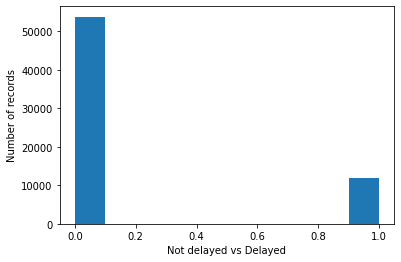

In [38]:
plt.hist(new_df17['ARR_DELAY'])
plt.rcParams["figure.figsize"] = (4,5)
plt.xlabel("Not delayed vs Delayed")
plt.ylabel("Number of records")
plt.show()

We have noticed that the data has class imbalance problem. Lets deal with the imbalace in next steps.

### Handling Class imbalance in the data

The data is imbalanced, we are applying the SMOTE() oversampling technique to balance the dataset

In [39]:
from imblearn.over_sampling import SMOTE

We are oversampling the minority class to be to 60% of the majority class as below

In [40]:
sm = SMOTE(random_state=42 , sampling_strategy = 0.6)
new_df17_feat = new_df17.drop(columns = 'ARR_DELAY')
new_df17_tg = new_df17.ARR_DELAY

In [41]:
x_res, y_res = sm.fit_resample(new_df17_feat, new_df17_tg)

In [42]:
x_res.shape #checking the shape of the resampled data

(86105, 30)

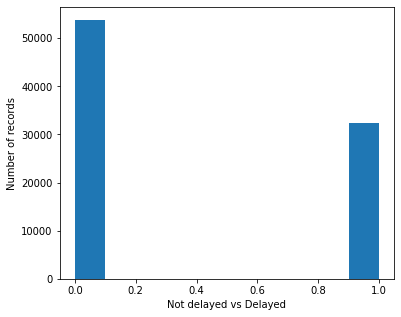

In [43]:
plt.rcParams["figure.figsize"] = (6,5)
plt.hist(y_res)
plt.xlabel("Not delayed vs Delayed")
plt.ylabel("Number of records")
plt.show()

In [44]:
res_data = x_res
res_data['ARR_DELAY'] = y_res

In [45]:
# Shuffling all the resampled data for randomness

In [46]:
from sklearn.utils import shuffle
data = shuffle(res_data).copy()
data.head()

,CRS_ELAPSED_TIME,Week_of_month_Month_Start,Week_of_month_Month_end,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,ORIGIN_DFW,...,CRS_DEP_TIME_Evening,CRS_DEP_TIME_Late Night,CRS_DEP_TIME_Morning,CRS_DEP_TIME_Night,CRS_ARR_TIME_Early Morning,CRS_ARR_TIME_Evening,CRS_ARR_TIME_Late Night,CRS_ARR_TIME_Morning,CRS_ARR_TIME_Night,ARR_DELAY
19818,164.0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
27051,287.0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
61528,200.0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
85556,159.0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
57176,170.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


We have one column 'CRS_ELAPSED_TIME' which is in minutes. So we have scaled the column with StandardScaler

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['CRS_ELAPSED_TIME'] = scaler.fit_transform(data[['CRS_ELAPSED_TIME']])
new_df18['CRS_ELAPSED_TIME'] = scaler.fit_transform(new_df18[['CRS_ELAPSED_TIME']])

### Defining features and target

In [48]:
# this will our training and validation dataset
data_feat = data.drop(columns=['ARR_DELAY'])
data_tg = data['ARR_DELAY']

#this will our unseen test data for 2018
data_18 = new_df18.drop(columns=['ARR_DELAY'])
target_18 = new_df18['ARR_DELAY']

### Checking feature importances

We are checking checking feature importances with SelectFromModel

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(RandomForestClassifier(n_estimators=300, random_state=42), threshold='median') 
select.fit(data_feat, data_tg)
new_feat = select.transform(data_feat)
print("Feature shape: {}".format(data_feat.shape))
print("New feature shape: {}".format(new_feat.shape))

Feature shape: (86105, 30)
New feature shape: (86105, 15)


In [50]:
#Selecting only the featurse from the feature importances and creating a new dataframe with new columns

In [51]:
selected_feat= data_feat.columns[(select.get_support())]
sel_feat = selected_feat.tolist()

In [52]:
new_feat1 = pd.DataFrame(new_feat, columns=sel_feat)

In [53]:
#This will be our test dataset for 2018
data_18 = pd.DataFrame(data_18,columns = sel_feat)


Checking the correlation with heatmap

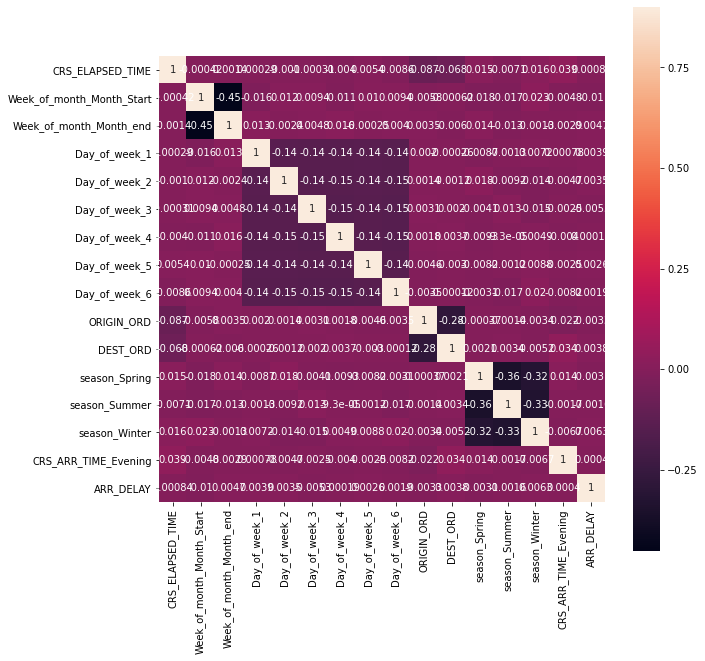

In [54]:
newforcorr = new_feat1.copy()
newforcorr['ARR_DELAY'] = data_tg.copy()
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(newforcorr.corr(), vmax=.9, square=True, annot=True)

It seems the columns we have created have some importances to our prediction. 

Now lets move ahead and train our model for the predictions

The first model we going to use is gradient boosting.

### Gradient Boosting Classifier

In [64]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 400, max_depth = 6, random_state = 42)


Cross-validation scores - mean: 0.7422681609662621
Training Accuracy : 0.7778275513082142
Testing Accuracy : 0.7464385258593992
[[13596  2549]
 [ 4001  5686]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.81     16145
           1       0.69      0.59      0.63      9687

    accuracy                           0.75     25832
   macro avg       0.73      0.71      0.72     25832
weighted avg       0.74      0.75      0.74     25832



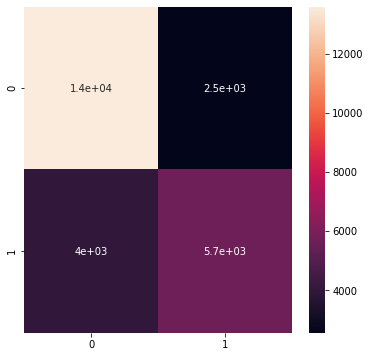

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(new_feat1, data_tg, test_size = 0.3, stratify = data_tg,\
                                                        random_state = 42)


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gbc, new_feat1, data_tg, cv=kfold)

print("Cross-validation scores - mean: {}".format(scores.mean()))


gbc.fit(Xtrain2, ytrain2)
ypred = gbc.predict(Xtest2)

# evaluating the model
print("Training Accuracy :", gbc.score(Xtrain2, ytrain2))
print("Testing Accuracy :", gbc.score(Xtest2, ytest2))

# confusion matrix
cm = confusion_matrix(ytest2, ypred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
print(cm)
# classification report
cr = classification_report(ytest2, ypred)
print(cr)

Even if it takes a longer time to train on larger datasets, its accuracy, precision, sensitivity and F2 score is moderate.

### Now lets check our gradient boost classifier on test set

In [66]:
new_y1 = gbc.predict(data_18)

[[14440 35664]
 [ 3542 10247]]
              precision    recall  f1-score   support

           0       0.80      0.29      0.42     50104
           1       0.22      0.74      0.34     13789

    accuracy                           0.39     63893
   macro avg       0.51      0.52      0.38     63893
weighted avg       0.68      0.39      0.41     63893



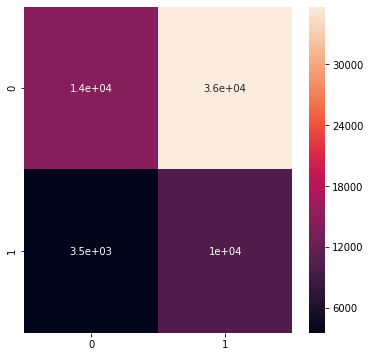

In [67]:
cm = confusion_matrix(target_18, new_y1)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
print(cm)
# classification report
cr = classification_report(target_18, new_y1)
print(cr)

When I tested my unseen dataset on the gradint boost, the performance of the model was not good. It misclassified most of the unseen data classes. 
One reason being, it trained on the oversampled dataset which is causing it to attain less performace on unseendata which has huge class imbalance

Next we moved on to the next model which is MLP classifier. It operates on Neural network and is known to yeild good performance for complex datasets

#### MLP Classifier

In [68]:
from sklearn.neural_network import MLPClassifier

In [69]:
mlp = MLPClassifier(random_state=42, max_iter=1000, warm_start=True)

Training Accuracy : 0.7125910440827568
Testing Accuracy : 0.708578507277795
[[13458  2687]
 [ 4841  4846]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     16145
           1       0.64      0.50      0.56      9687

    accuracy                           0.71     25832
   macro avg       0.69      0.67      0.67     25832
weighted avg       0.70      0.71      0.70     25832



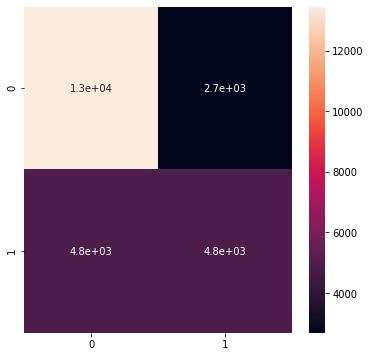

In [70]:
Xtrain5, Xtest5, ytrain5, ytest5 = train_test_split(new_feat1, data_tg, test_size = 0.3, stratify = data_tg,\
                                                        random_state = 42)


mlp.fit(Xtrain5,ytrain5)
ypred5 = mlp.predict(Xtest5)

# evaluating the model
print("Training Accuracy :", mlp.score(Xtrain5, ytrain5))
print("Testing Accuracy :", mlp.score(Xtest5, ytest5))

# confusion matrix
cm = confusion_matrix(ytest5, ypred5)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
print(cm)
# classification report
cr = classification_report(ytest5, ypred5)
print(cr)

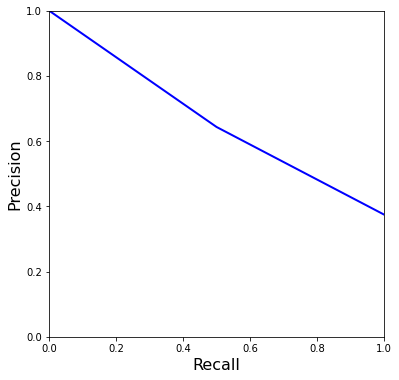

<Figure size 576x432 with 0 Axes>

In [71]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(ytest5, ypred5)
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.ylabel("Precision", fontsize=16)
    plt.xlabel("Recall", fontsize=16)
    plt.axis([0, 1, 0, 1])      
    plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### Check it on Unseen data of 2018

[[41533  8571]
 [10718  3071]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     50104
           1       0.26      0.22      0.24     13789

    accuracy                           0.70     63893
   macro avg       0.53      0.53      0.53     63893
weighted avg       0.68      0.70      0.69     63893



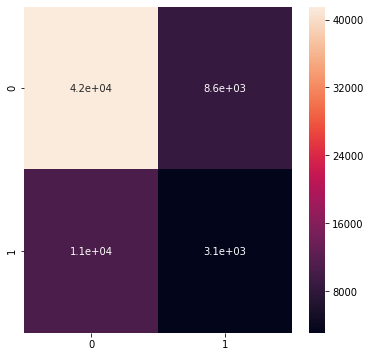

In [72]:
new_y6 = mlp.predict(data_18)
cm = confusion_matrix(target_18, new_y6)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
print(cm)
# classification report
cr = classification_report(target_18, new_y6)
print(cr)

MLP classifier performed better on unseen dataset of 2018 than gradient boost classifier. But it predicted more Flase negative and because of that the precision, recall and F1 score had suffered. 

## Stochastic gradient descent classifier

In [73]:
from sklearn.linear_model import SGDClassifier

In [74]:
sgd = SGDClassifier(loss="hinge", penalty="l1", max_iter=100)

Training Accuracy : 0.6957509996184029
Testing Accuracy : 0.7032750077423351
[[13924  2221]
 [ 5444  4243]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.78     16145
           1       0.66      0.44      0.53      9687

    accuracy                           0.70     25832
   macro avg       0.69      0.65      0.65     25832
weighted avg       0.70      0.70      0.69     25832



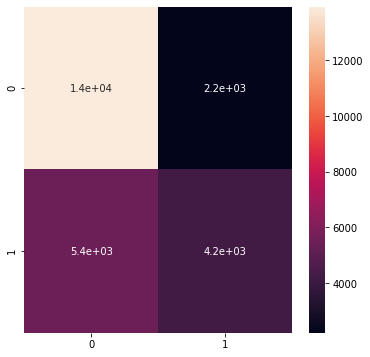

In [75]:
Xtrain8, Xtest8, ytrain8, ytest8 = train_test_split(new_feat1, data_tg, test_size = 0.3, stratify = data_tg,\
                                                        random_state = 42)


sgd.fit(Xtrain8,ytrain8)
ypred8 = sgd.predict(Xtest8)

# evaluating the model
print("Training Accuracy :", sgd.score(Xtrain8, ytrain8))
print("Testing Accuracy :", sgd.score(Xtest8, ytest8))

# confusion matrix
cm = confusion_matrix(ytest8, ypred8)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
print(cm)
# classification report
cr = classification_report(ytest8, ypred8)
print(cr)

### Checking on the unseen Dataset of 2018

[[42949  7155]
 [11637  2152]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     50104
           1       0.23      0.16      0.19     13789

    accuracy                           0.71     63893
   macro avg       0.51      0.51      0.50     63893
weighted avg       0.67      0.71      0.68     63893



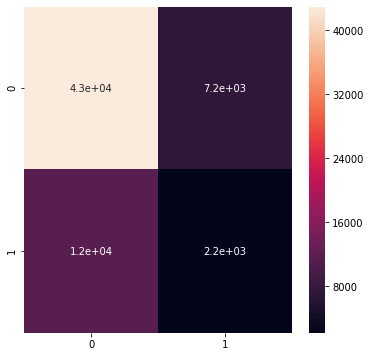

In [76]:
new_y8 = sgd.predict(data_18)
cm = confusion_matrix(target_18, new_y8)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
print(cm)
# classification report
cr = classification_report(target_18, new_y8)
print(cr)

The performace of SGD on unseen dataset is poor that both models. It suffered a blow in precision, recall and F1 score

Concluding Remark :

So far, MLP classifier had performed better than other two models we used. More fine tuning and feature engineerinng will yeild better results than we got.

My suggestion would be to use MLP classifier to detect the arriving delay of the flights with the limited number of columns which we considered from a consumer perspective.

Also, there would always be a factor of uncertainty in predicting a flight delay for next year as some external factors other than what we consider for our analysis might have impact on the flight delay.

## Thank You !!!